# **Red Wine Homework**

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 10]       

In [4]:
data = pd.read_csv("/content/winequality-red.csv")

In [5]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
data.shape

(1599, 12)

In [7]:
data[data.isnull().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# correlation
set_option('precision', 2)
data.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-2.56e-01,0.67,1.15e-01,9.37e-02,-1.54e-01,-0.11,0.67,-0.68,1.83e-01,-0.06,0.12
volatile acidity,-0.26,1.00e+00,-0.55,1.92e-03,6.13e-02,-1.05e-02,0.08,0.02,0.23,-2.61e-01,-0.20,-0.39
citric acid,0.67,-5.52e-01,1.00,1.44e-01,2.04e-01,-6.10e-02,0.04,0.36,-0.54,3.13e-01,0.11,0.23
residual sugar,0.11,1.92e-03,0.14,1.00e+00,5.56e-02,1.87e-01,0.20,0.36,-0.09,5.53e-03,0.04,0.01
chlorides,0.09,6.13e-02,0.20,5.56e-02,1.00e+00,5.56e-03,0.05,0.20,-0.27,3.71e-01,-0.22,-0.13
free sulfur dioxide,-0.15,-1.05e-02,-0.06,1.87e-01,5.56e-03,1.00e+00,0.67,-0.02,0.07,5.17e-02,-0.07,-0.05
total sulfur dioxide,-0.11,7.65e-02,0.04,2.03e-01,4.74e-02,6.68e-01,1.00,0.07,-0.07,4.29e-02,-0.21,-0.19
density,0.67,2.20e-02,0.36,3.55e-01,2.01e-01,-2.19e-02,0.07,1.00,-0.34,1.49e-01,-0.50,-0.17
pH,-0.68,2.35e-01,-0.54,-8.57e-02,-2.65e-01,7.04e-02,-0.07,-0.34,1.00,-1.97e-01,0.21,-0.06
sulphates,0.18,-2.61e-01,0.31,5.53e-03,3.71e-01,5.17e-02,0.04,0.15,-0.20,1.00e+00,0.09,0.25


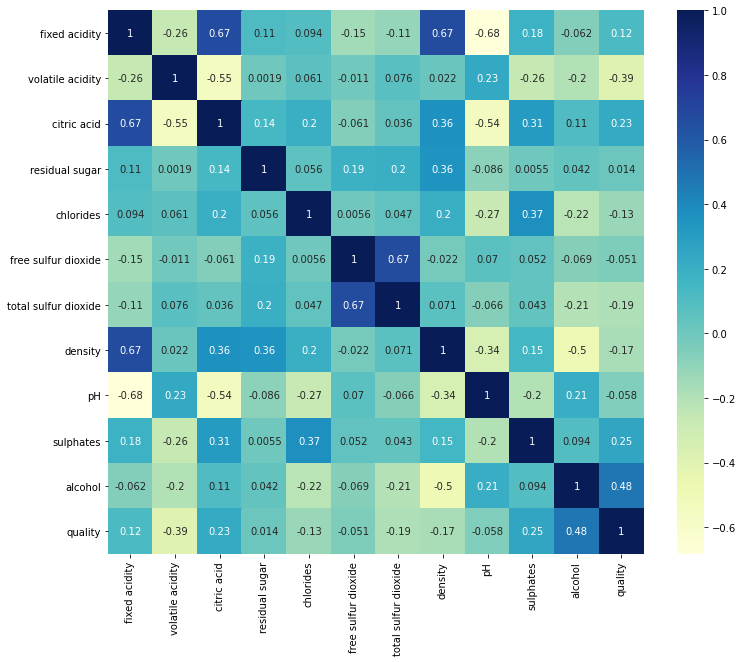

In [10]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

In [11]:
#Correlation with output variable
cor_target = abs(cor["quality"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

volatile acidity    0.39
sulphates           0.25
alcohol             0.48
quality             1.00
Name: quality, dtype: float64

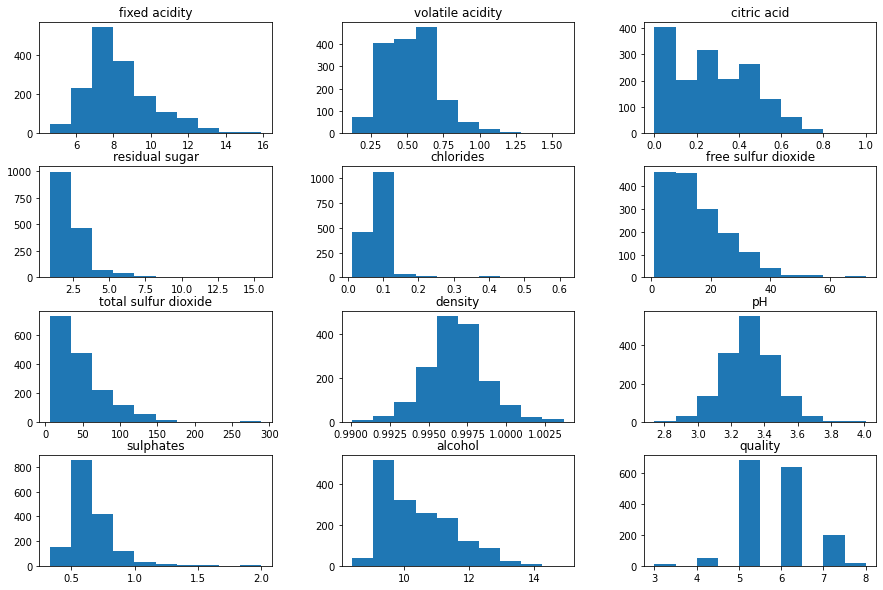

In [12]:
# Data visualizations

# histograms
data.hist(bins=10,figsize=(15,10),grid=False);

In [13]:
cor_target

fixed acidity           0.12
volatile acidity        0.39
citric acid             0.23
residual sugar          0.01
chlorides               0.13
free sulfur dioxide     0.05
total sulfur dioxide    0.19
density                 0.17
pH                      0.06
sulphates               0.25
alcohol                 0.48
quality                 1.00
Name: quality, dtype: float64

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.9818293  0.6709624  0.31803859 4.53639479 5.67501653 1.24939385
 1.51410919 0.07122077 0.19350176 2.42639346 0.86002106 0.21759721]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


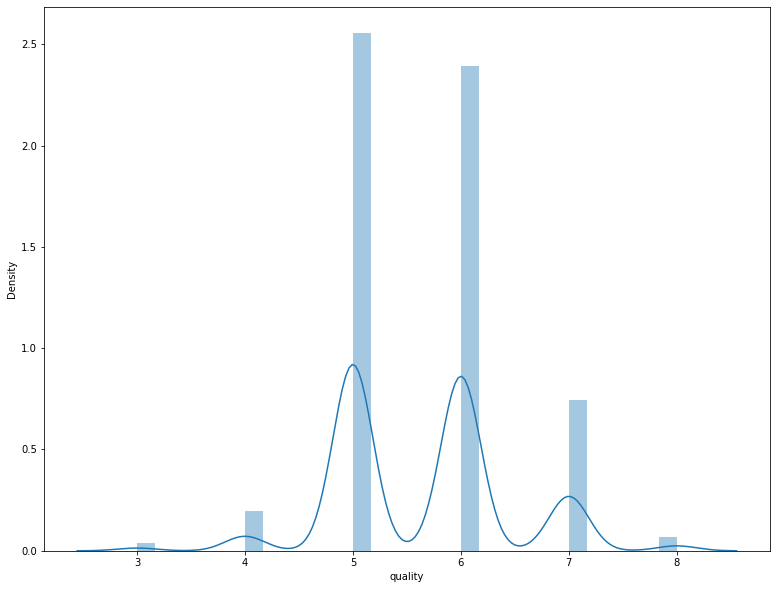

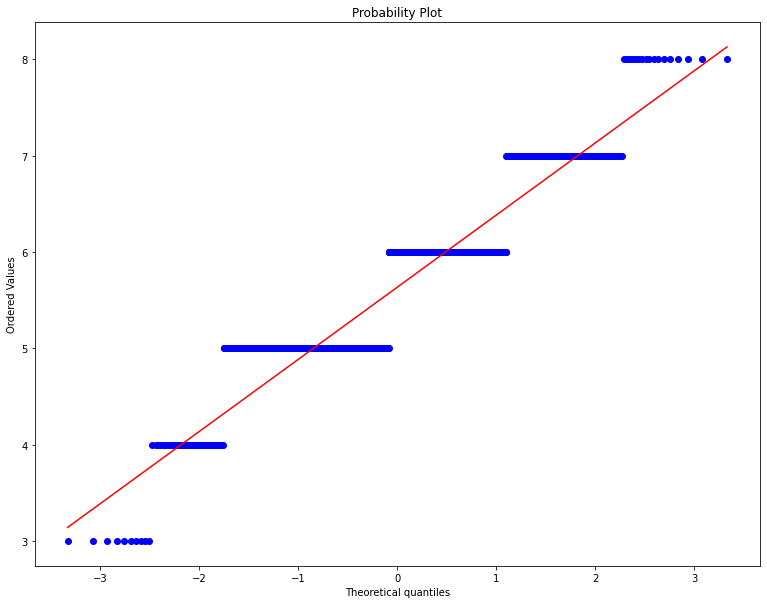

In [15]:
from scipy import stats
#histogram and normal probability plot
print( data.columns )
print( stats.skew(data) )

sns.distplot(data['quality'], hist=True);
fig = plt.figure()
res = stats.probplot(data['quality'], plot=plt)

In [16]:
# variable selection
x = data.drop(columns=['quality'])
x = x[['volatile acidity','sulphates','alcohol']]
y = data["quality"]
print(x.shape)
print(y.shape)

(1599, 3)
(1599,)


In [17]:
from sklearn.model_selection import train_test_split
#testing data size is of 33% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [19]:
print(x.columns)
print(model.intercept_)
print(model.coef_)

Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')
2.538053571815932
[-1.24589318  0.65587012  0.32113945]


In [20]:
y_pred = model.predict(x_test)

In [21]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.45
909,6,6.19


Text(0, 0.5, 'Predicted Y')

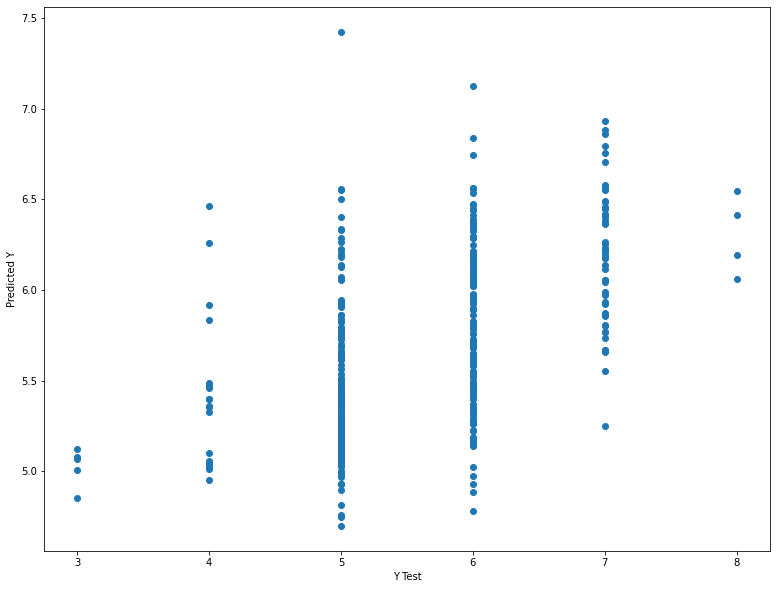

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))
print(y_test.mean())

# R^2
print( model.score(x_test,y_test) )

0.7247871008598725
5.585
0.27319519688304217


In [24]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

,Actual,Predict
678,5,5.13
1500,5,5.07
1457,5,5.20
1079,7,6.45
909,6,6.19
...,...,...
1528,6,5.86
647,4,5.40
352,5,5.17
116,6,5.48


# **Post Processing**

In [26]:
sorted(data)
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

fixed acidity           2.10e+00
volatile acidity        2.50e-01
citric acid             3.30e-01
residual sugar          7.00e-01
chlorides               2.00e-02
free sulfur dioxide     1.40e+01
total sulfur dioxide    4.00e+01
density                 2.23e-03
pH                      1.90e-01
sulphates               1.80e-01
alcohol                 1.60e+00
quality                 1.00e+00
dtype: float64


In [28]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.10,25.0,67.0,1.00,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.09,15.0,54.0,1.00,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.07,17.0,60.0,1.00,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.08,11.0,34.0,1.00,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99,3.45,0.58,10.5,5
1595,5.9,0.55,0.10,2.2,0.06,39.0,51.0,1.00,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.08,29.0,40.0,1.00,3.42,0.75,11.0,6
1597,5.9,0.65,0.12,2.0,0.07,32.0,44.0,1.00,3.57,0.71,10.2,5


In [30]:
# correlation
set_option('precision', 2)
data_cleared_iqr.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.27,6.59e-01,2.30e-01,0.20,-1.51e-01,-8.71e-02,0.61,-0.68,0.17,-0.04,1.13e-01
volatile acidity,-0.27,1.00,-6.27e-01,3.52e-02,0.12,-1.67e-02,9.75e-02,0.04,0.22,-0.32,-0.22,-3.47e-01
citric acid,0.66,-0.63,1.00e+00,1.49e-01,0.07,-6.89e-02,4.66e-03,0.31,-0.47,0.26,0.14,2.12e-01
residual sugar,0.23,0.04,1.49e-01,1.00e+00,0.23,8.84e-02,2.00e-01,0.39,-0.05,0.04,0.10,7.93e-03
chlorides,0.20,0.12,7.30e-02,2.33e-01,1.00,1.23e-02,1.77e-01,0.41,-0.18,-0.08,-0.30,-1.91e-01
free sulfur dioxide,-0.15,-0.02,-6.89e-02,8.84e-02,0.01,1.00e+00,6.20e-01,-0.02,0.15,0.11,-0.02,-3.61e-03
total sulfur dioxide,-0.09,0.10,4.66e-03,2.00e-01,0.18,6.20e-01,1.00e+00,0.15,0.01,-0.05,-0.25,-2.03e-01
density,0.61,0.04,3.05e-01,3.95e-01,0.41,-2.15e-02,1.50e-01,1.00,-0.23,0.08,-0.54,-2.15e-01
pH,-0.68,0.22,-4.70e-01,-5.47e-02,-0.18,1.49e-01,1.00e-02,-0.23,1.00,0.01,0.13,-6.03e-02
sulphates,0.17,-0.32,2.57e-01,4.02e-02,-0.08,1.07e-01,-4.97e-02,0.08,0.01,1.00,0.26,4.14e-01


In [31]:
#Correlation with output variable
cor_target = abs(cor["quality"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

volatile acidity    0.39
sulphates           0.25
alcohol             0.48
quality             1.00
Name: quality, dtype: float64

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
[0.73688144 0.26926177 0.31117035 0.60953515 0.22209539 0.83058877
 0.97861938 0.05187523 0.06057182 0.62300692 0.78152439 0.25642334]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


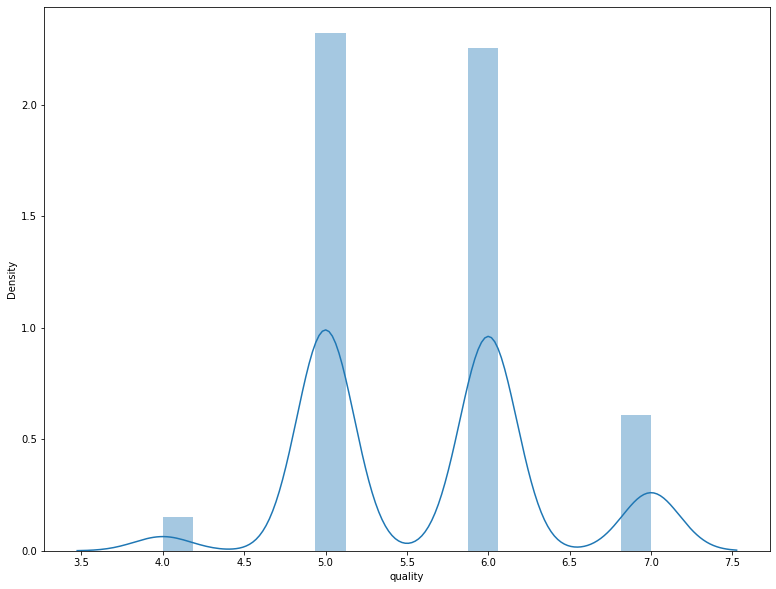

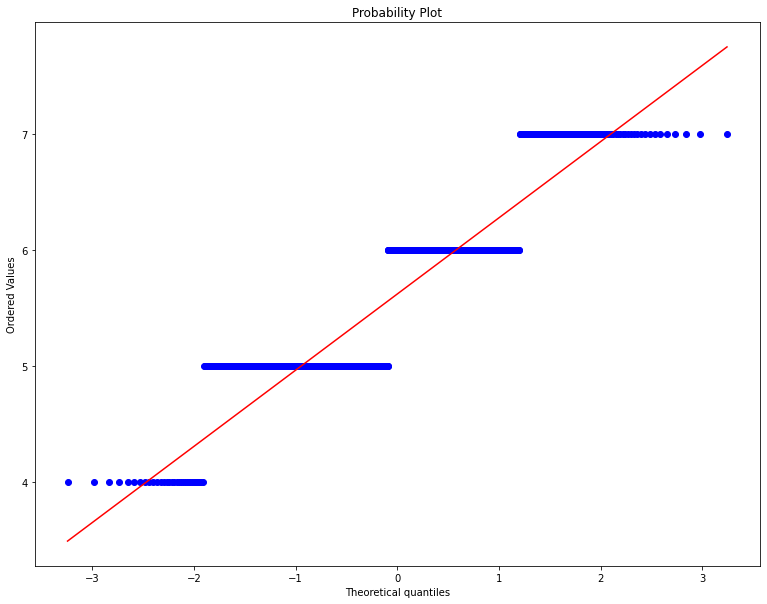

In [32]:
from scipy import stats
#histogram and normal probability plot
print( data_cleared_iqr.columns )
print( stats.skew(data_cleared_iqr) )

sns.distplot(data_cleared_iqr['quality'], hist=True);
fig = plt.figure()
res = stats.probplot(data_cleared_iqr['quality'], plot=plt)

In [35]:
# variable selection
x = data_cleared_iqr.drop(columns=['quality'])
x = x[['volatile acidity','sulphates','alcohol']]
y = data_cleared_iqr["quality"]
print(x.shape)
print(y.shape)

(1179, 3)
(1179,)


In [36]:
from sklearn.model_selection import train_test_split
#testing data size is of 25% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=101) 

In [37]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression() 
model = lm.fit(x_train,y_train) 

In [39]:
print(x.columns)
print(model.intercept_) # w0
print(model.coef_) # w1 w2 w3

Index(['volatile acidity', 'sulphates', 'alcohol'], dtype='object')
2.3166110018271255
[-0.8668031   1.38931766  0.27769497]


In [40]:
y_pred = model.predict(x_test)

In [41]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred}).head()

,Actual,Predict
577,5,5.41
406,6,5.84
1591,6,5.67
1284,5,5.76
2,5,5.28


Text(0, 0.5, 'Predicted Y')

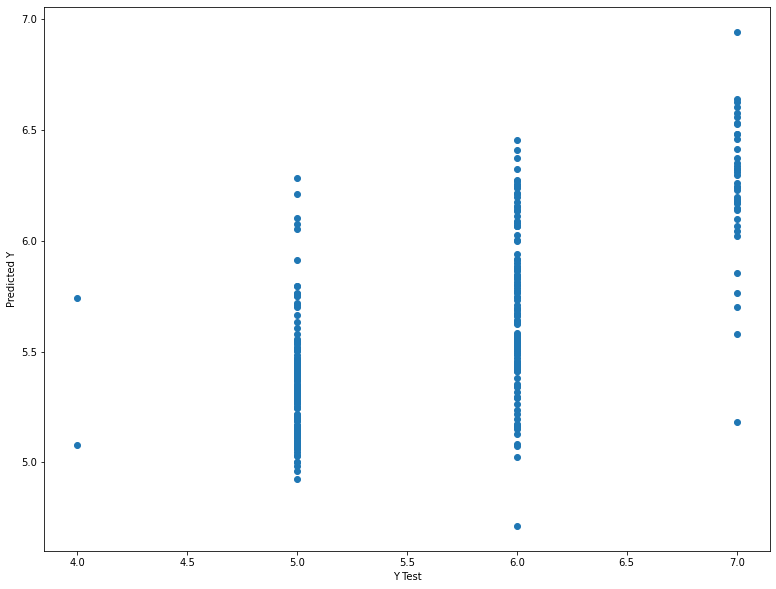

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [43]:
# calculate MSE
import math
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))
print(y_test.mean())

# R^2
print( model.score(x_test,y_test) )

0.5307557892965689
5.640677966101695
0.4529590947573198


In [44]:
pd.DataFrame({"Actual": y_test, "Predict": y_pred})

,Actual,Predict
577,5,5.41
406,6,5.84
1591,6,5.67
1284,5,5.76
2,5,5.28
...,...,...
60,5,5.41
1164,5,5.34
24,6,5.54
900,5,6.28


# **Answer**

**â€¢ Check linearity assumption to target (corr)**
  
  fixed acidity           0.12
  
  volatile acidity        0.39
  
  citric acid             0.23
  
  residual sugar          0.01
  
  chlorides               0.13
  
  free sulfur dioxide     0.05
  
  total sulfur dioxide    0.19
  
  density                 0.17
  
  pH                      0.06
  
  sulphates               0.25
  
  alcohol                 0.48
  
  quality                 1.00

**â€¢ Select variables**

  condition corr >= .25

  sulphates               0.25
  
  alcohol                 0.48
  
  volatile acidity        0.39  

**â€¢ Create model & report equation**

  quality = (volatile acidity * -1.24589318) +  (sulphates * 0.65587012) +  (alcohol * 0.32113945)

**â€¢ Predict & evaluate RMSE & R2 on Test set**

  RMSE = 0.7247871008598725

  R^2 = 0.27319519688304217

**â€¢ Are there any predicted value out of range?**

  still in range 

**â€¢ Improve your model (post-processing)**

  à¸à¸³à¸ˆà¸±à¸” outliers à¸”à¹‰à¸§à¸¢à¸à¸²à¸£à¹ƒà¸Šà¹‰ boxplot à¸à¸³à¸ˆà¸±à¸”à¸„à¹ˆà¸²à¸—à¸µà¹ˆà¹€à¸à¸´à¸™ 1.5 * IQR à¸«à¸£à¸·à¸­à¸™à¹‰à¸­à¸¢à¸à¸§à¹ˆà¸² -1.5 * IQR à¸­à¸­à¸à¹„à¸› à¹à¸¥à¹‰à¸§à¸—à¸³à¸à¸²à¸£ reprocess à¹ƒà¸«à¸¡à¹ˆ

**â€¢ Re-evaluate RMSE & on R-square on Test set**

quality = (volatile acidity * -0.8668031) +  (sulphates * 1.38931766) +  (alcohol * 0.27769497)

RMSE = 0.5307557892965689

R^2 = 0.4529590947573198